In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
diamonds_train = pd.read_csv('outputs/df_train.csv')
diamonds_train_price = pd.read_csv('outputs/df_train_price.csv')
diamonds_predict=pd.read_csv('outputs/df_test.csv')
submit=pd.read_csv('inputs/sample_submission.csv')

In [29]:
diamonds_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,-1.051355,-0.810564,0.352161,-0.033632,0.736126,-0.650176,-1.283716,-1.236438,-1.180531
1,-0.966764,0.982588,0.940769,-0.641579,0.596363,-1.097476,-1.132102,-1.080061,-1.039596
2,-0.839879,-0.810564,1.529377,-0.641579,-1.010919,2.033618,-0.918059,-0.854183,-0.969129
3,-0.839879,0.086012,-0.825055,0.574315,0.037308,0.781181,-0.900222,-0.862870,-0.870475
4,0.217504,-0.810564,1.529377,-0.641579,-0.521746,2.480917,0.330526,0.344710,0.271096


In [30]:
diamonds_predict.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,3.267015,0.978152,-1.416151,-1.232414,-0.666318,-1.554540,2.620734,2.539800,2.446736
1,2.596725,0.978152,-0.830504,-1.232414,0.168508,-0.658049,2.175567,2.234832,2.230593
2,-0.608098,0.978152,-1.416151,-0.627731,-0.040199,-1.554540,-0.495431,-0.491942,-0.492811
3,-1.047976,0.978152,-1.416151,-0.627731,-0.318474,-0.658049,-1.261117,-1.263332,-1.285335
4,0.334497,-2.592365,-0.830504,-0.023048,4.899190,-0.658049,0.332578,0.216660,0.890505


# Split train and test

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diamonds_train, diamonds_train_price, test_size=0.01)

In [32]:
X_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
10519,0.492423,-0.810564,-0.236447,-1.249527,0.945772,0.244422,0.606999,0.553213,0.693900
11295,-0.586107,-1.707140,0.940769,-1.249527,1.365062,-0.650176,-0.543483,-0.506678,-0.377203
39885,2.057349,-0.810564,1.529377,-0.641579,-1.779618,1.586319,1.900176,1.951921,1.624069
13656,-0.438073,0.982588,-0.236447,-0.033632,0.596363,-1.544775,-0.365114,-0.306862,-0.264456
8981,1.274886,-0.810564,-1.413663,-0.033632,-1.779618,1.139020,1.445334,1.361162,1.130798


In [33]:
y_test.head()

,price
5731,660
39218,2553
31213,556
6803,10693
18582,3763


# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [40]:
diamonds_model= LinearRegression()

In [41]:
diamonds_model.fit(X_train, y_train)
print('Coeff >>>>',diamonds_model.coef_)
print('Intercept >>>>',diamonds_model.intercept_)

Coeff >>>> [[ 5159.63980424   137.23732981   547.63030042   818.88410079
   -110.11260117   -50.92508109 -1037.03962411    22.27176432
    -18.04534654]]
Intercept >>>> [3928.78557615]


In [42]:
pre = diamonds_model.predict(X_test)

In [43]:
y_test_linear = y_test.copy()
y_test_linear['y']= pre

In [44]:
y_test_linear['Price-y'] = abs(y_test_linear['price']- y_test_linear['y'])
y_test_linear.describe()

,price,y,Price-y
count,405.000000,405.000000,405.000000
mean,4283.641975,4290.665391,810.869587
std,4378.315962,4095.497356,933.543242
min,403.000000,-1341.442014,0.102878
25%,992.000000,1121.180793,260.629318
50%,2863.000000,3406.748833,560.249714
75%,5357.000000,5752.210099,1033.773469
max,18803.000000,22626.921426,7745.899589


In [45]:
from sklearn.metrics import mean_squared_error, r2_score
print( "Errore quadratico medio:% .2f" % mean_squared_error ( y_test_linear['price'], y_test_linear['y']))
print( 'R²:% .2f' % r2_score ( y_test_linear['price'], y_test_linear['y']))

Errore quadratico medio: 1526860.61
R²: 0.92


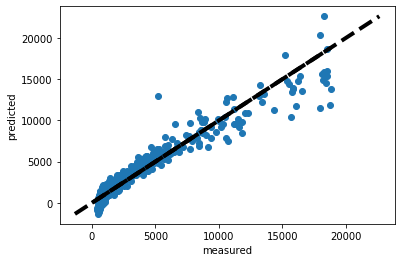

In [46]:
fig, ax = plt.subplots()
ax.scatter( y_test_linear['price'], y_test_linear['y'])
ax.plot([y_test_linear.min(), y_test_linear.max()], [y_test_linear.min(), y_test_linear.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [ ]:
import statsmodels.api as sm
X_train2 = sm.add_constant(X_train)
y_train2 = y_train
model = sm.OLS(y_train2, X_train2)
results = model.fit()
print(results.summary())